In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import keras as k
import tensorflow as tf

In [ ]:
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fruit-Prices-2022.csv')
df.info()

# Özellikleri ve etiketleri ayırır
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Verileri eğitim ve test kümelerine ayırır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fruit               62 non-null     object 
 1   Form                62 non-null     object 
 2   RetailPrice         62 non-null     float64
 3   RetailPriceUnit     62 non-null     object 
 4   Yield               62 non-null     float64
 5   CupEquivalentSize   62 non-null     float64
 6   CupEquivalentUnit   62 non-null     object 
 7   CupEquivalentPrice  62 non-null     float64
dtypes: float64(4), object(4)
memory usage: 4.0+ KB


In [ ]:
# csv dosyasındaki verilerin boyutları
print(df.shape)

(62, 8)


In [ ]:
# veri seti içerisindeki görüntünün boyutları
print(df.iloc[0].shape)

(8,)


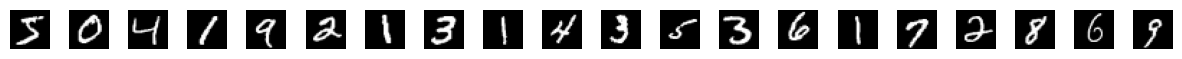

In [ ]:
# veri setindeki görüntünün görselleştirilmesi
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.figure(figsize=(15, 7))
plt.subplots_adjust(wspace=0.5)
for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(784,)))
network.add(layers.Dense(12, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
network.compile(optimizer= 'rmsprop',
                loss= 'categorical_crossentropy',
                metrics= ['accuracy'])

In [ ]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32')/255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32')/255

In [ ]:
# modelin eğitilmesi

from keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=12)
y_test = to_categorical(y_test, num_classes=12)

X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype('float32') / 255

network.fit(X_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.1453 - loss: 2.3397
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.4644 - loss: 2.0820
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.6504 - loss: 1.4653
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7522 - loss: 1.0084
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8044 - loss: 0.7725


In [ ]:
test_loss, test_acc = network.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8069 - loss: 0.6982


In [ ]:
# doğruluk değerleri

print("Test loss : ",test_loss)
print("Test accuracy : ",test_acc)

Test loss :  0.6407973766326904
Test accuracy :  0.83160001039505


In [ ]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │           6,156 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 816,154 (3.11 MB)

 Trainable params: 408,076 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 408,078 (1.56 MB)

In [ ]:
y_pred = network.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


Precision: 0.8316385612498228
Recall: 0.8316
F1 Score: 0.8292593756211816


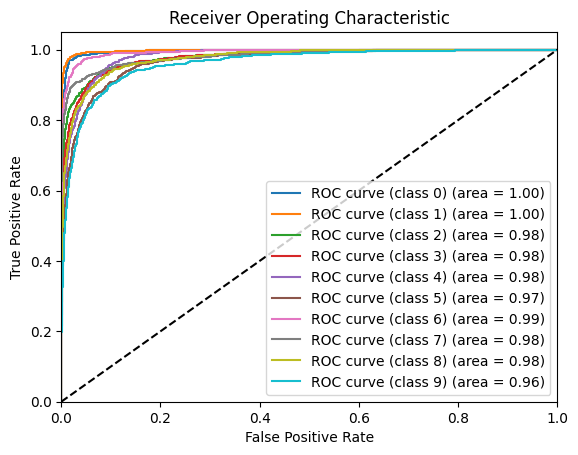

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Precision, Recall ve F1-Score ile doğruluk değerleri hesaplandı
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC AUC ve ROC Curve (tek bir sınıf için)
fpr = {}
tpr = {}
roc_auc = {}

# Her sınıf için ROC AUC hesaplandı

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = roc_auc_score(y_test[:, i], y_pred[:, i])

# Plot ROC Curve
plt.figure()
for i in range(10):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()